In [1]:
import pandas as pd

In [2]:
path = '../data/figures/Copy of C. aurita 29_05 - observations-580257.csv'

df = pd.read_csv(path)
df

,id,uuid,observed_on_string,observed_on,time_observed_at,time_zone,user_id,user_login,user_name,created_at,...,place_county_name,place_state_name,place_country_name,place_admin1_name,place_admin2_name,species_guess,scientific_name,common_name,iconic_taxon_name,taxon_id
0,633677,8093d342-8dba-4a88-8eb2-277fc01186d4,2014-04-20,2014-04-20,NaN,Eastern Time (US & Canada),557,rontavius,Clinton Jenkins,2014-04-20 16:48:51 UTC,...,Nazaré Paulista,São Paulo,Brazil,São Paulo,Nazaré Paulista,Buffy-tufted-ear Marmoset,Callithrix aurita,Sagui-da-serra-escuro,Mammalia,43375
1,5308815,9576d5ad-63e7-43b5-b484-87f549b040ae,Sun Mar 12 2017 10:36:37 GMT-0300 (GMT-3),2017-03-12,2017-03-12 13:36:37 UTC,Brasilia,231737,deboas,B. Phalan,2017-03-14 23:36:56 UTC,...,Teresópolis,Rio de Janeiro,Brazil,Rio de Janeiro,Teresópolis,Buffy-tufted-ear Marmoset,Callithrix aurita,Sagui-da-serra-escuro,Mammalia,43375
2,5805592,6e6d5c4b-cb0e-4476-aaea-ed1f3f1b28cd,Sun Apr 16 2017 09:21:54 GMT-0300 (GMT-3),2017-04-16,2017-04-16 12:21:54 UTC,Brasilia,231737,deboas,B. Phalan,2017-04-18 00:17:17 UTC,...,Sapucaia,Rio de Janeiro,Brazil,Rio de Janeiro,Sapucaia,Buffy-tufted-ear Marmoset,Callithrix aurita,Sagui-da-serra-escuro,Mammalia,43375
3,6007282,71f4f7c0-b7f7-41ff-bf79-47f3cac90c5f,Sat Apr 22 2017 13:10:54 GMT-0300 (GMT-3),2017-04-22,2017-04-22 16:10:54 UTC,Brasilia,231737,deboas,B. Phalan,2017-04-29 15:45:00 UTC,...,São José do Vale do Rio Preto,Rio de Janeiro,Brazil,Rio de Janeiro,São José do Vale do Rio Preto,Buffy-tufted-ear Marmoset,Callithrix aurita,Sagui-da-serra-escuro,Mammalia,43375
4,8976388,ebdeec33-a9ee-4f56-b198-1fe257cd5e65,2017/11/29 6:59 AM -02,2017-11-29,NaN,Brasilia,61934,sandrovonmatter,Sandro Von Matter,2017-11-29 10:48:20 UTC,...,Nazaré Paulista,São Paulo,Brazil,São Paulo,Nazaré Paulista,Buffy-tufted-ear Marmoset,Callithrix aurita,Sagui-da-serra-escuro,Mammalia,43375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,280458896,d917a9e4-0920-49f0-b721-5ca3a29200e3,2025-05-04 16:27:48,2025-05-04,2025-05-04 19:27:48 UTC,Brasilia,2677620,juliano2020,Juliano Marques,2025-05-12 05:32:50 UTC,...,NaN,NaN,NaN,NaN,NaN,Sagui-da-serra-escuro,Callithrix aurita,Sagui-da-serra-escuro,Mammalia,43375
277,282365794,74f29201-1c54-4623-860f-e4da15e9932e,2025/05/18 07:56,2025-05-18,2025-05-18 10:56:00 UTC,Brasilia,2487189,anderson62,Anderson Rabello Pereira,2025-05-19 13:41:05 UTC,...,Petrópolis,Rio de Janeiro,Brazil,Rio de Janeiro,Petrópolis,Sagui-da-serra-escuro,Callithrix aurita,Sagui-da-serra-escuro,Mammalia,43375
278,282757107,2e84a75a-758b-43af-a393-4e5de5c47737,2025-05-20 16:18:09,2025-05-20,2025-05-20 19:18:09 UTC,Brasilia,16291,el_neotropico,Daniel Pineda Vera,2025-05-20 23:11:37 UTC,...,Jundiaí,São Paulo,Brazil,São Paulo,Jundiaí,Callithrix aurita,Callithrix aurita,Sagui-da-serra-escuro,Mammalia,43375
279,283178070,9a5f56e1-6228-4f8d-910d-cb930aaa1dff,2025-05-22 11:24:22,2025-05-22,2025-05-22 14:24:22 UTC,Brasilia,3083803,ezabella,NaN,2025-05-22 17:15:24 UTC,...,Salesópolis,São Paulo,Brazil,São Paulo,Salesópolis,Sagui-da-serra-escuro,Callithrix aurita,Sagui-da-serra-escuro,Mammalia,43375


In [3]:
df.columns

Index(['id', 'uuid', 'observed_on_string', 'observed_on', 'time_observed_at',
       'time_zone', 'user_id', 'user_login', 'user_name', 'created_at',
       'updated_at', 'quality_grade', 'license', 'url', 'image_url',
       'sound_url', 'tag_list', 'description', 'num_identification_agreements',
       'num_identification_disagreements', 'captive_cultivated',
       'oauth_application_id', 'place_guess', 'latitude', 'longitude',
       'positional_accuracy', 'private_place_guess', 'private_latitude',
       'private_longitude', 'public_positional_accuracy', 'geoprivacy',
       'taxon_geoprivacy', 'coordinates_obscured', 'positioning_method',
       'positioning_device', 'place_town_name', 'place_county_name',
       'place_state_name', 'place_country_name', 'place_admin1_name',
       'place_admin2_name', 'species_guess', 'scientific_name', 'common_name',
       'iconic_taxon_name', 'taxon_id'],
      dtype='object')

In [4]:
df['observed_on'] = pd.to_datetime(df['observed_on'])
df['observed_on']

0     2014-04-20
1     2017-03-12
2     2017-04-16
3     2017-04-22
4     2017-11-29
         ...    
276   2025-05-04
277   2025-05-18
278   2025-05-20
279   2025-05-22
280   2022-11-05
Name: observed_on, Length: 281, dtype: datetime64[ns]

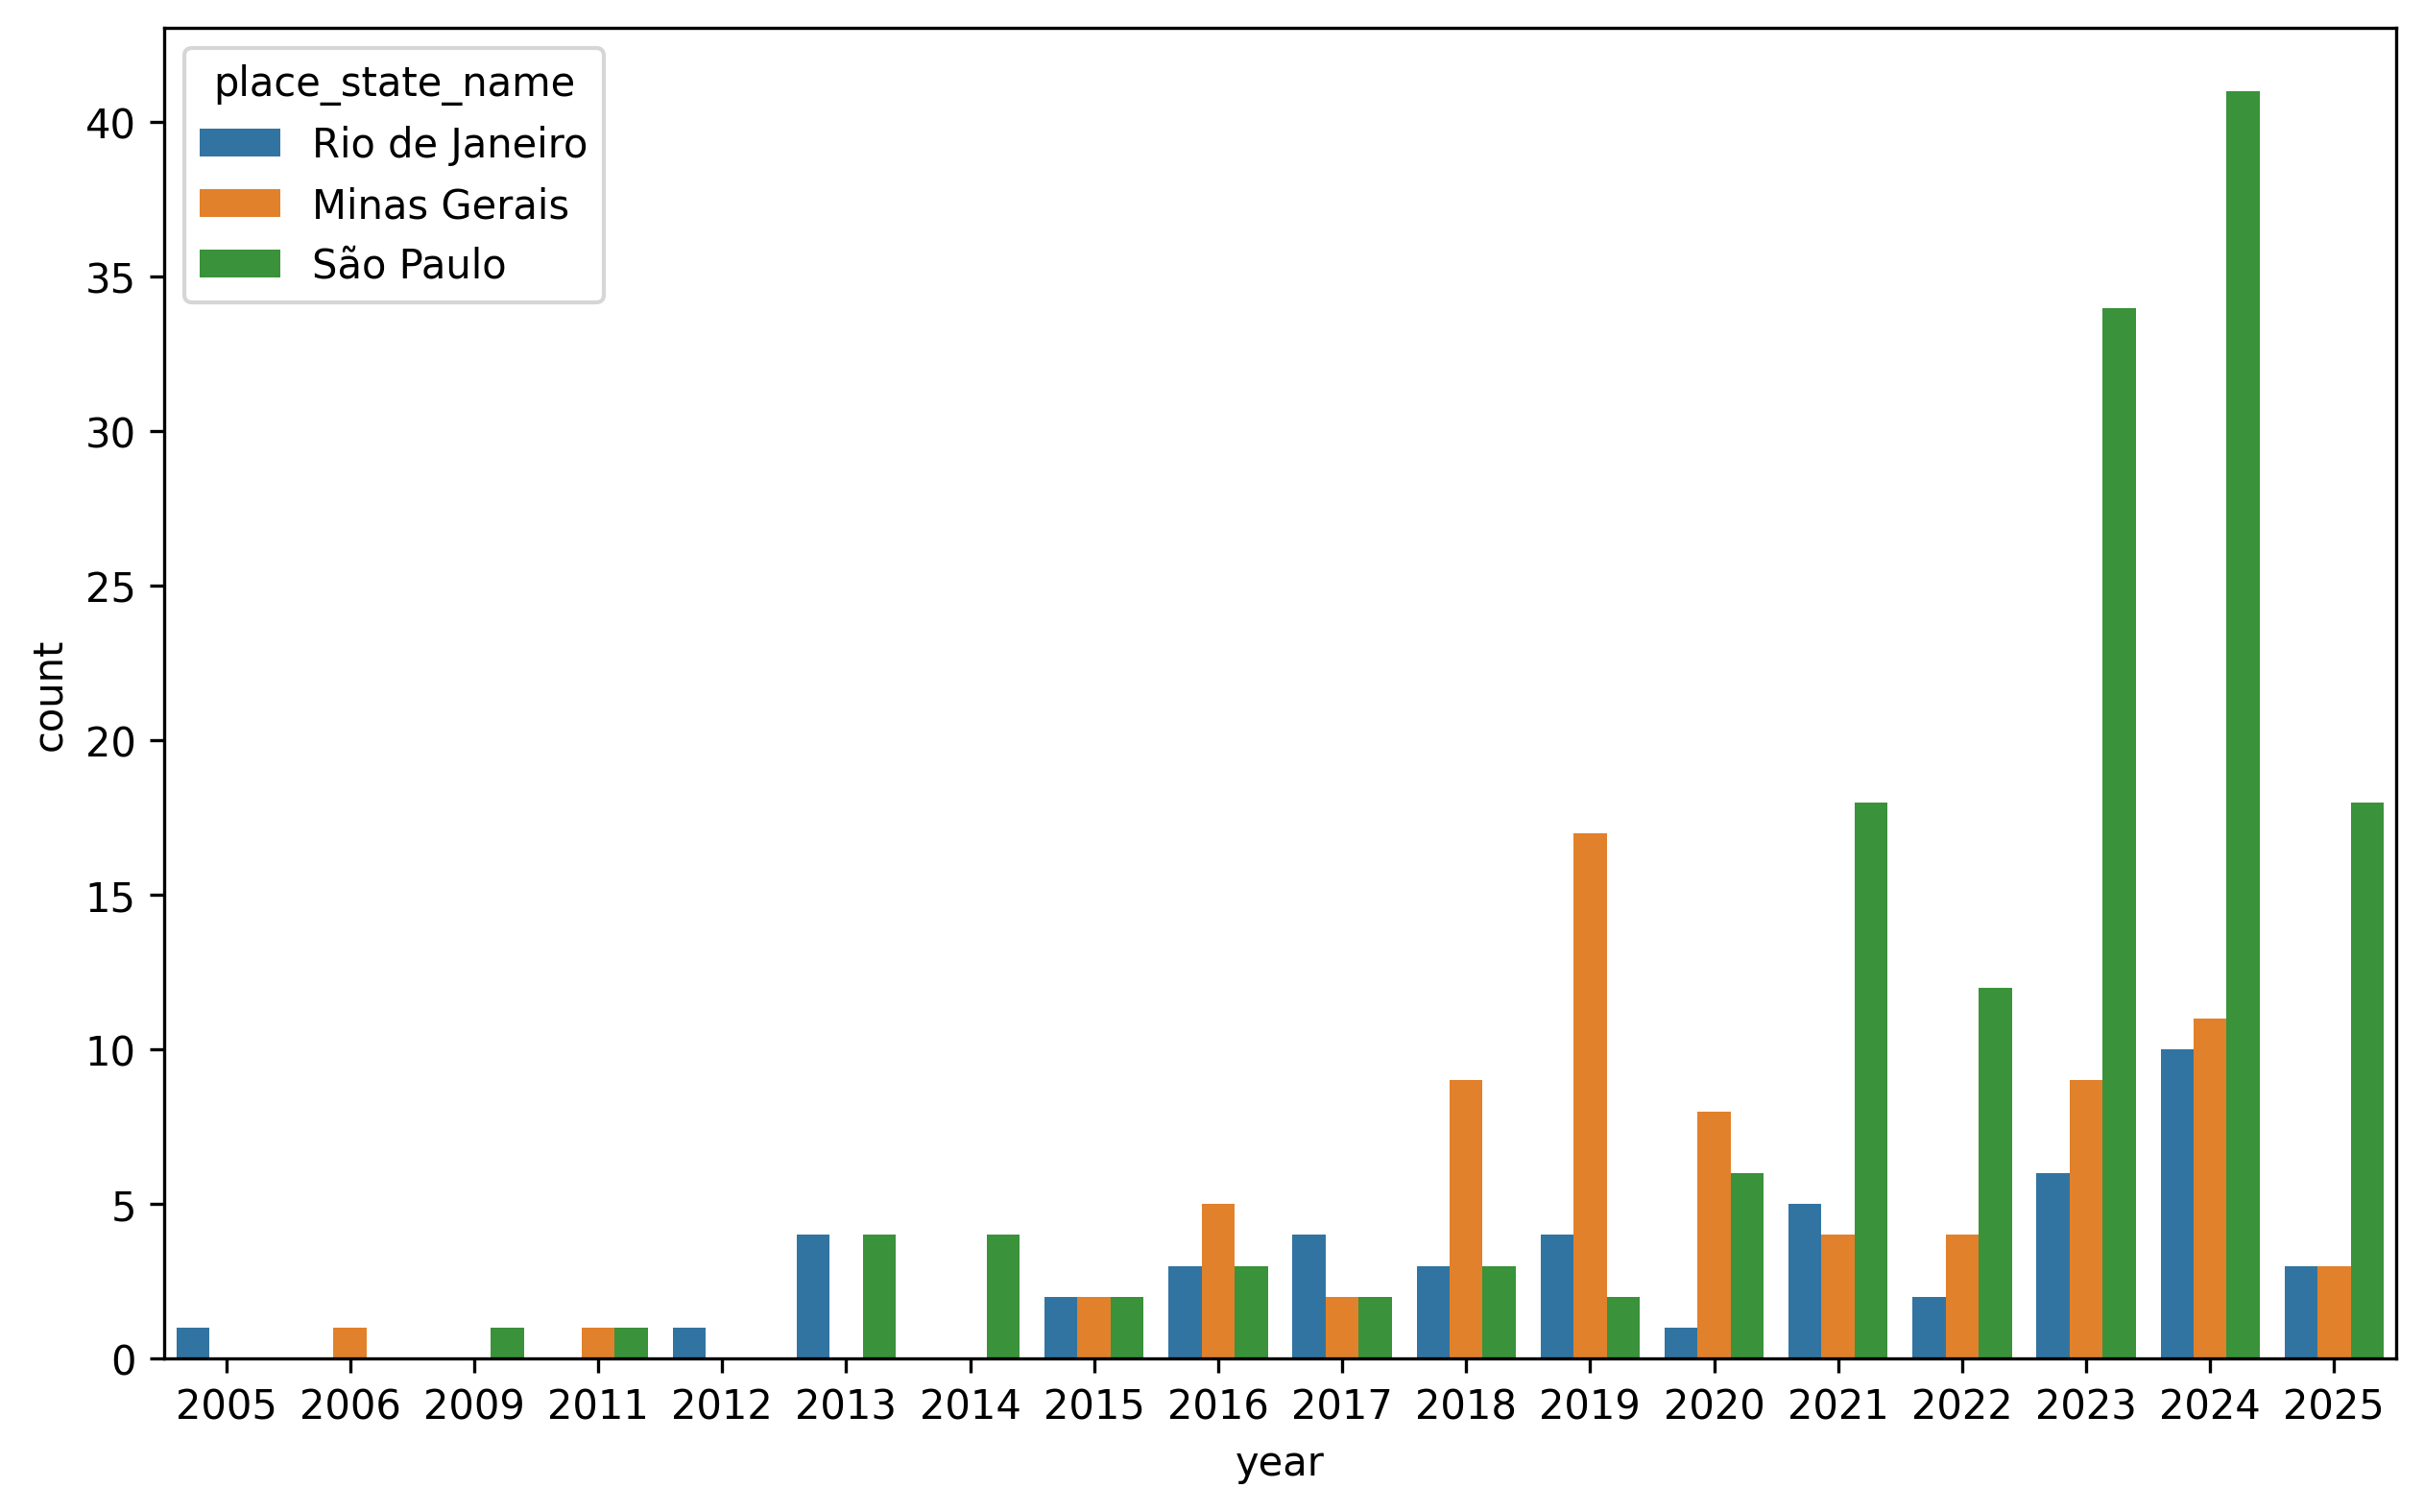

In [9]:
import seaborn as sns

import matplotlib.pyplot as plt

df['year'] = df['observed_on'].dt.year

yearly_counts = df.groupby(['year', 'place_state_name']).size().reset_index(name='count')

# Customize dpi and resolution
dpi = 300  # Set your desired dpi
fig = plt.figure(dpi=dpi, figsize=(10, 6))  # Adjust figsize as needed



sns.barplot(data=yearly_counts, x='year', y='count', hue='place_state_name', errorbar=None)
plt.show()

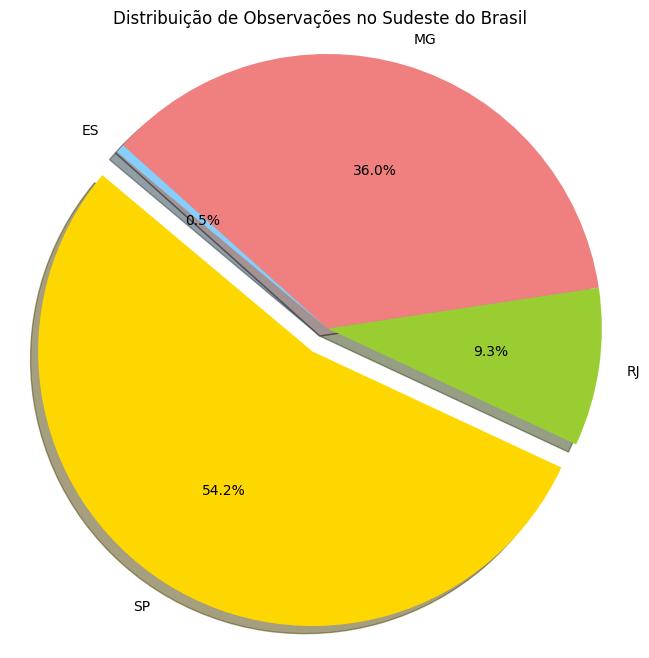

In [1]:
import matplotlib.pyplot as plt

# Data for the pie chart (observations in Southeast Brazil)
labels = ['SP', 'RJ', 'MG', 'ES']
sizes = [1040, 179, 691, 10]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0, 0)  # explode 1st slice (SP)

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

plt.title('Distribuição de Observações no Sudeste do Brasil')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()